Plot the contours and the data aligned 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

# Import CMasher to register colormaps
import cmasher as cmr

from astropy.wcs import WCS

In [2]:
#HST

hst_file = "/home/carlos/Downloads/Total_Arcs_wcs.fits"
hst_hdu = fits.open(hst_file)               #Abrindo imagem
hst_img = hst_hdu[1].data                   #Pega os dados da img
hst_wcs = WCS(hst_hdu[1].header)            #Pega wcs do hst

In [3]:
#ALMA

alma_file = "/home/carlos/Downloads/ALMA_resampled_with_beam.fits"
alma_hdu = fits.open(alma_file)               #Abrindo imagem
alma_img = alma_hdu[0].data                   #Pega os dados da img
alma_wcs = WCS(alma_hdu[0].header)            #Pega wcs do alma

Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


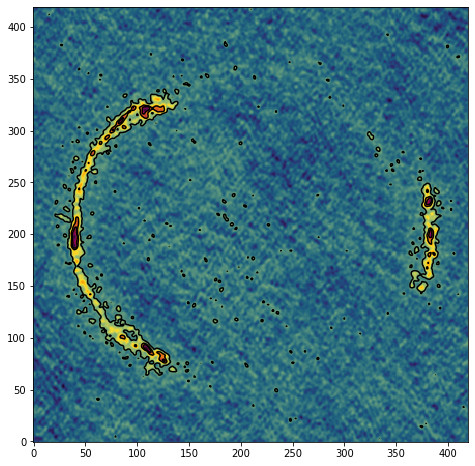

In [107]:
plt.figure(figsize=(12,8))
ax = plt.gca()
ax.axis('equal')
ax.set_adjustable('box')

levels = alma_img.max() * 10**(-0.5*np.arange(0, 2, 0.5)[::-1]) # 0.5 mag/arcsec^2 steps
cnt = ax.contour(alma_img/alma_img.max(), [0.2, 0.5, 0.7], colors = 'k', linestyles='solid')
ax.imshow(alma_img/alma_img.max(), cmap=cmr.pride, interpolation='nearest', origin='lower',
                   )


In [66]:
from reproject import reproject_interp

alma_reshape, alma_ootprint = reproject_interp((alma_img, alma_wcs), hst_hdu[1].header)

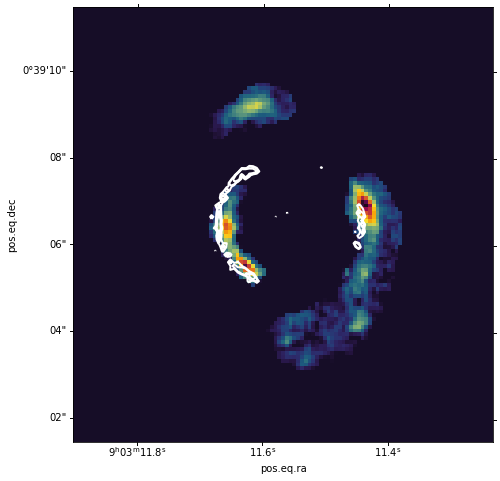

In [127]:
plt.figure(figsize=(12,8))
ax = plt.gca(projection=hst_wcs)
ax.axis('equal')
ax.set_adjustable('box')



ax.imshow(hst_img/hst_img.max(), cmap=cmr.pride, interpolation='nearest', origin='lower', vmin=0)
cnt = ax.contour(alma_reshape/alma_img.max(), levels=[0.2, 0.25, 0.35], colors = 'white', linestyles='solid',linewidths=2)


/home/carlos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()